<center style="padding: 1em 2em;  margin: 1em 0;">
    <h1 style="font-size: 2.2em; margin: 0 0 0.5em 0; color:rgb(52, 72, 92);">
        «От ML-модели к Production: Деплой с Streamlit»
    </h1>
    <div style="font-size: 1.4em; color:rgb(52, 72, 92); font-weight: 600;">
        Зуев Гордей
    </div>
</center>

## План вебинара (1-1.5 часа)

1. **От анализа к действию: от EDA к работающей модели** (20 мин)
   - Быстрое резюме: что мы узнали из EDA
   - Подготовка финальной модели для продакшена
   - Сохранение модели и препроцессинга

2. **Знакомство с фреймворком Streamlit** (15 мин)
   - Что такое Streamlit и зачем он нужен
   - Основные компоненты
   - Первое "Hello World" приложение

3. **Создание интерфейса для ML-модели** (30 мин)
   - Создание формы ввода данных
   - Загрузка и использование модели
   - Визуализация результатов
   - Добавление интерактивности

4. **Деплой на Streamlit Cloud** (20 мин)
   - Подготовка проекта к деплою
   - Деплой на Streamlit Cloud
   - Тестирование и шеринг приложения


---

**Датасет:** Предсказание оттока клиентов (`Churn Prediction`)

**Ссылка на датасет:** `https://raw.githubusercontent.com/Murcha1990/datasets/refs/heads/main/churn_cliens_demo.csv`

**Задача:** Предсказать, уйдет ли клиент из компании (бинарная классификация)


# **Часть 1: От EDA к работающей модели**

## **Что мы уже знаем из EDA (краткое резюме)**

На предыдущем занятии мы:
- Изучили распределение признаков
- Выявили корреляции
- Обработали пропуски
- Закодировали категориальные переменные
- Обучили несколько моделей

**Сегодня мы сфокусируемся на том, как превратить нашу модель в работающее приложение!**


## **Шаг 1.1: Загрузка данных и библиотек**

### Вопросы:
- Какие библиотеки нужны для ML-проекта?
- Зачем нужно сохранять модель?
- Что такое "production-ready" модель?


In [39]:
# Основные библиотеки
import pandas as pd  # работа с таблицами
import matplotlib.pyplot as plt  # базовые визуализации
import seaborn as sns  # красивые графики поверх matplotlib

# ML библиотеки
from sklearn.model_selection import train_test_split  # разделяем данные на train/test

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)  # базовые метрики качества
from catboost import CatBoostClassifier  # модель, которая умеет работать с категориальными строками

# Для сохранения модели
import joblib  # показываем альтернативный способ сериализации

In [ ]:
import pandas as pd  # чтобы блок работал даже при изолированном запуске
import requests  # скачиваем CSV по ссылке
from io import StringIO  # превращаем текстовый ответ в файловый объект

url = 'https://raw.githubusercontent.com/Murcha1990/datasets/refs/heads/main/churn_cliens_demo.csv'  # исходные данные (демо)

# Скачиваем содержимое
response = requests.get(url)  # получаем файл как текст
response.encoding = 'utf-8'  # Указываем кодировку, если нужно

# Создаем DataFrame из содержимого
df = pd.read_csv(StringIO(response.text))  # читаем CSV прямо из памяти, без временных файлов

df.to_csv("churn_cliens_demo.csv", index=False)  # сохраняем на диск, чтобы использовать в Streamlit

In [75]:
# Загрузка данных
url = 'https://raw.githubusercontent.com/Murcha1990/datasets/refs/heads/main/churn_cliens_demo.csv'
df = pd.read_csv(url)

df.to_csv("churn_cliens_demo.csv", index=False)  # сохраняем на диск, чтобы использовать в Streamlit

In [42]:
print(f"Размер датасета: {df.shape}")

Размер датасета: (3333, 20)


In [43]:
df.sample(10)

,state,accountlength,areacode,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,customerservicecalls,churn
1389,OH,94,510,No,No,0,194.1,62.0,33.00,227.2,54.0,19.31,190.4,115.0,8.57,15.3,4.0,4.13,1,False
1383,VT,72,415,No,Yes,21,138.1,113.0,23.48,260.1,83.0,22.11,135.4,118.0,6.09,8.2,2.0,2.21,2,False
1095,ID,106,510,No,No,0,274.4,120.0,46.65,198.6,82.0,16.88,160.8,62.0,7.24,6.0,3.0,1.62,1,False
1284,OR,135,415,No,No,0,263.8,66.0,44.85,251.3,116.0,21.36,200.1,112.0,9.00,8.4,2.0,2.27,5,True
2000,PA,28,415,No,No,0,168.2,87.0,28.59,161.7,92.0,13.74,192.4,112.0,8.66,10.1,3.0,2.73,3,False
743,LA,158,408,No,No,0,202.0,126.0,34.34,163.5,86.0,13.90,195.4,84.0,8.79,10.4,6.0,2.81,1,False
1181,MI,67,510,No,Yes,35,245.4,89.0,41.72,148.2,102.0,12.60,274.0,136.0,12.33,7.5,6.0,2.03,1,False
773,MA,127,408,Yes,No,0,176.9,110.0,30.07,167.9,100.0,14.27,182.2,138.0,8.20,7.7,2.0,2.08,1,True
910,NJ,42,415,No,Yes,32,163.8,80.0,27.85,177.8,123.0,15.11,190.4,106.0,8.57,8.1,5.0,2.19,0,False
2531,RI,180,415,No,No,0,143.3,134.0,24.36,180.5,113.0,15.34,184.2,87.0,8.29,10.1,4.0,2.73,1,False


**Быстрый обзор данных:**

In [44]:
print(f"\nКоличество строк: {len(df)}")


Количество строк: 3333


In [45]:
print(f"Количество столбцов: {len(df.columns)}")

Количество столбцов: 20


In [46]:
print(f"\nСтолбцы:\n{df.columns.tolist()}")


Столбцы:
['state', 'accountlength', 'areacode', 'internationalplan', 'voicemailplan', 'numbervmailmessages', 'totaldayminutes', 'totaldaycalls', 'totaldaycharge', 'totaleveminutes', 'totalevecalls', 'totalevecharge', 'totalnightminutes', 'totalnightcalls', 'totalnightcharge', 'totalintlminutes', 'totalintlcalls', 'totalintlcharge', 'customerservicecalls', 'churn']


In [47]:
print(f"\nПропущенные значения:\n{df.isnull().sum().sum()} всего")


Пропущенные значения:
0 всего


In [48]:
print(f"\nТипы данных:\n{df.dtypes.value_counts()}")


Типы данных:
float64    12
int64       4
object      3
bool        1
Name: count, dtype: int64


### 💬 Обсуждение: Целевая переменная

In [49]:
# Проверка баланса классов
print("Распределение целевой переменной (churn):")
print(df['churn'].value_counts())

Распределение целевой переменной (churn):
churn
False    2850
True      483
Name: count, dtype: int64


In [50]:
print(f"\nПроцентное соотношение:\n{df['churn'].value_counts(normalize=True) * 100}")


Процентное соотношение:
churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64


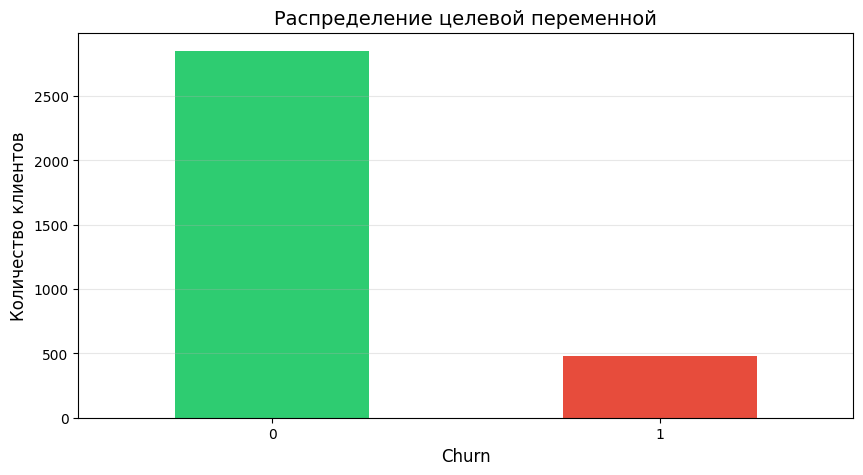

In [51]:
# Визуализация
plt.figure(figsize=(10, 5))

# Преобразуем boolean в int для корректного отображения
churn_counts = df['churn'].astype(int).value_counts()
churn_counts.plot(kind='bar', color=['#2ecc71', '#e74c3c'])

plt.title('Распределение целевой переменной', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.show()

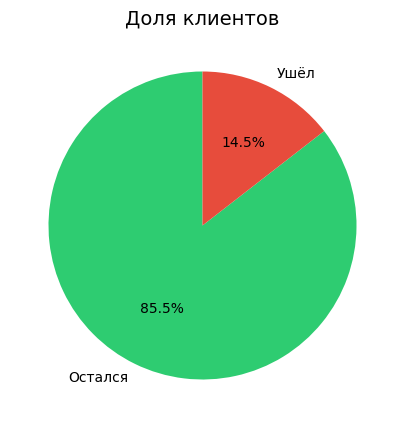

In [52]:
# Визуализация
plt.figure(figsize=(10, 5))

churn_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'], startangle=90, labels=['Остался', 'Ушёл'])
plt.title('Доля клиентов', fontsize=14)
plt.ylabel('')

plt.show()

**Вопрос к аудитории:** Что такое дисбаланс классов? Почему это важно?

**Ответ:** Если одного класса значительно больше другого, модель может просто "научиться" предсказывать самый частый класс и иметь высокую точность, но быть бесполезной.

## Шаг 1.2: Подготовка данных для модели

Для того чтобы модель работала в production, нам нужно:
1. **Сохранить все трансформации** (кодирование, нормализация)
2. **Применять те же самые трансформации** к новым данным
3. **Обеспечить консистентность** между обучением и предсказанием

**Вопрос:** Что произойдёт, если мы обучим модель на нормализованных данных, а в production будем подавать ненормализованные?

**Ответ:** Модель будет давать некорректные предсказания!

In [53]:
# Создаем копию данных для обработки
df_processed = df.copy()

# Проверим типы данных
print("Информация о типах данных:")
print(df_processed.info())

Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 3333 non-null   object 
 1   accountlength         3333 non-null   int64  
 2   areacode              3333 non-null   int64  
 3   internationalplan     3333 non-null   object 
 4   voicemailplan         3333 non-null   object 
 5   numbervmailmessages   3333 non-null   int64  
 6   totaldayminutes       3333 non-null   float64
 7   totaldaycalls         3333 non-null   float64
 8   totaldaycharge        3333 non-null   float64
 9   totaleveminutes       3333 non-null   float64
 10  totalevecalls         3333 non-null   float64
 11  totalevecharge        3333 non-null   float64
 12  totalnightminutes     3333 non-null   float64
 13  totalnightcalls       3333 non-null   float64
 14  totalnightcharge      3333 non-null   float64

In [54]:
# Проверим пропуски в данных
print("Проверка пропусков:")
missing = df_processed.isnull().sum()
missing

Проверка пропусков:


state                   0
accountlength           0
areacode                0
internationalplan       0
voicemailplan           0
numbervmailmessages     0
totaldayminutes         0
totaldaycalls           0
totaldaycharge          0
totaleveminutes         0
totalevecalls           0
totalevecharge          0
totalnightminutes       0
totalnightcalls         0
totalnightcharge        0
totalintlminutes        0
totalintlcalls          0
totalintlcharge         0
customerservicecalls    0
churn                   0
dtype: int64

In [55]:
if missing.sum() > 0:
    print(missing[missing > 0])
    
    # Создаем словарь с средними значениями для числовых столбцов
    numeric_means = df_processed.select_dtypes(include=['int64', 'float64']).mean()
    
    # Создаем словарь с модами для категориальных столбцов
    categorical_modes = df_processed.select_dtypes(exclude=['int64', 'float64']).mode().iloc[0]
    
    # Объединяем словари
    fill_values = {**numeric_means, **categorical_modes}
    
    # Заполняем пропуски за одну операцию
    df_processed = df_processed.fillna(fill_values)
else:
    print("✅ Пропусков нет!")

print(f"\nПропуски после обработки: {df_processed.isnull().sum().sum()}")

✅ Пропусков нет!

Пропуски после обработки: 0


### Подготовка категориальных признаков для CatBoost

<div style="padding: 12px 16px; margin: 16px 0; border-radius: 6px; border-left: 4px solid #3b82f6; background-color: #eff6ff; color: #1e40af;">
<strong>ℹ️ Важно!</strong><br>CatBoost работает с категориальными признаками напрямую, поэтому нам не нужно их кодировать через LabelEncoder. Достаточно преобразовать их в строковый тип.
</div>


In [56]:
# Обработка категориальных признаков
# Найдем все категориальные колонки (тип object)

categorical_columns = df_processed.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['state', 'internationalplan', 'voicemailplan']

In [57]:
df_processed["internationalplan"].unique()

array(['No', 'Yes'], dtype=object)

In [58]:
# Исключаем целевую переменную 'churn'
categorical_columns = list(set(categorical_columns) - {'churn'})

print(f"Категориальные признаки для кодирования: {categorical_columns}")
print(f"Количество: {len(categorical_columns)}")

Категориальные признаки для кодирования: ['internationalplan', 'state', 'voicemailplan']
Количество: 3


In [59]:
# Преобразуем категориальные признаки в строки для CatBoost
df_processed[categorical_columns] = df_processed[categorical_columns].astype(str)

# Анализ категориальных признаков в одном цикле
for column in categorical_columns:
    unique_vals = df_processed[column].unique()
    n_unique = len(unique_vals)
    
    print(f"\n{column}:")
    show_count = 5 if n_unique <= 5 else 10
    print(f"  Классы (первые {show_count}): {unique_vals[:show_count].tolist()}")
    print(f"  Всего классов: {n_unique}")

print(f"\n✅ Подготовлено {len(categorical_columns)} категориальных признаков для CatBoost")


internationalplan:
  Классы (первые 5): ['No', 'Yes']
  Всего классов: 2

state:
  Классы (первые 10): ['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN']
  Всего классов: 51

voicemailplan:
  Классы (первые 5): ['Yes', 'No']
  Всего классов: 2

✅ Подготовлено 3 категориальных признаков для CatBoost


In [60]:
# Подготовка признаков и целевой переменной
X = df_processed.drop(['churn'], axis=1)
y = df_processed['churn']

# Преобразуем y к числовому типу (из bool в int)
y = y.astype(int)

print(f"Форма признаков X: {X.shape}")
print(f"Форма целевой переменной y: {y.shape}")
print(f"Тип y: {y.dtype}")
print(f"\nПризнаки для модели ({len(X.columns)}):")
for i, col in enumerate(X.columns, 1):
    print(f"  {i:2}. {col}")


Форма признаков X: (3333, 19)
Форма целевой переменной y: (3333,)
Тип y: int64

Признаки для модели (19):
   1. state
   2. accountlength
   3. areacode
   4. internationalplan
   5. voicemailplan
   6. numbervmailmessages
   7. totaldayminutes
   8. totaldaycalls
   9. totaldaycharge
  10. totaleveminutes
  11. totalevecalls
  12. totalevecharge
  13. totalnightminutes
  14. totalnightcalls
  15. totalnightcharge
  16. totalintlminutes
  17. totalintlcalls
  18. totalintlcharge
  19. customerservicecalls


### **Разделение данных**

💬 **Вопрос к аудитории:** Зачем нужен параметр `stratify`?

**Ответ:** Он обеспечивает одинаковое соотношение классов в train и test!


In [61]:
# Разделение на train и test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Важно для сбалансированного разделения!
)

print(f"Train set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nРаспределение классов в train:")
print(y_train.value_counts())
print(f"\nРаспределение классов в test:")
print(y_test.value_counts())


Train set: (2666, 19)
Test set: (667, 19)

Распределение классов в train:
churn
0    2280
1     386
Name: count, dtype: int64

Распределение классов в test:
churn
0    570
1     97
Name: count, dtype: int64


In [62]:
# Проверим, что пропорции сохранились
train_churn_rate = y_train.sum() / len(y_train) * 100
test_churn_rate = y_test.sum() / len(y_test) * 100
print(f"\n✅ Процент оттока в train: {train_churn_rate:.1f}%")
print(f"✅ Процент оттока в test: {test_churn_rate:.1f}%")


✅ Процент оттока в train: 14.5%
✅ Процент оттока в test: 14.5%


In [63]:
# CatBoost работает с категориальными признаками "из коробки"
# Поэтому вместо нормализации подготовим список cat_features
cat_features = [X.columns.get_loc(col) for col in categorical_columns if col in X.columns]

print("✅ Сформирован список cat_features для CatBoost")
print(f"Категориальных признаков: {len(cat_features)}")
print(f"Индексы cat_features: {cat_features}")


✅ Сформирован список cat_features для CatBoost
Категориальных признаков: 3
Индексы cat_features: [3, 0, 4]


In [64]:
print("Категориальные признаки, которые передадим в CatBoost:")
for col in categorical_columns:
    print(f" - {col}")

Категориальные признаки, которые передадим в CatBoost:
 - internationalplan
 - state
 - voicemailplan


## Шаг 1.3: Обучение финальной модели

### 💡 Обсуждение: Выбор модели для production

**Для production мы переходим на CatBoost, потому что:**
- ✅ Нативно работает с категориальными признаками (`cat_features`)
- ✅ Показывает высокий ROC-AUC без сложной настройки
- ✅ Автоматически обрабатывает пропуски и категориальные значения
- ✅ Даёт важности признаков и поддерживает explainability-инструменты
- ✅ Быстро обучается и хорошо переносится в production (есть бинарные модели)

**Альтернативы:**
- Random Forest (привычный бэйзлайн, но проигрывает на категориальных фичах)
- XGBoost/LightGBM (похожий класс бустинга, но сложнее в настройке)
- Logistic Regression (проще, но требует сильной подготовки признаков)


In [65]:
# Обучение модели
print("🚀 Начинаем обучение CatBoost...\n")

import time
start_time = time.time()

model = CatBoostClassifier(
    iterations=100,
    depth=2,
    learning_rate=0.1,
    loss_function='Logloss',
    eval_metric='AUC',
    cat_features=cat_features,
    random_seed=42,
    verbose=False
)

model.fit(
    X_train,
    y_train,
    eval_set=(X_test, y_test),
    use_best_model=True,
    verbose=False
)

training_time = time.time() - start_time
best_auc = model.get_best_score().get('validation', {}).get('AUC')
print(f"\n✅ CatBoost обучен за {training_time:.2f} секунд!")
if best_auc is not None:
    print(f"📈 Лучший AUC на валидации: {best_auc:.4f}")


🚀 Начинаем обучение CatBoost...


✅ CatBoost обучен за 0.08 секунд!
📈 Лучший AUC на валидации: 0.8989


### Оценка модели


In [66]:
# Делаем предсказания (CatBoost принимает исходные признаки)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Вычисляем метрики
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("=" * 60)
print("РЕЗУЛЬТАТЫ МОДЕЛИ")
print("=" * 60)
print(f"\n📊 Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"📊 ROC-AUC: {roc_auc:.4f}")
print("\n" + "=" * 60)
print("CLASSIFICATION REPORT")
print("=" * 60)
print(classification_report(y_test, y_pred, target_names=['Остался (0)', 'Ушёл (1)']))


РЕЗУЛЬТАТЫ МОДЕЛИ

📊 Accuracy: 0.9220 (92.20%)
📊 ROC-AUC: 0.8989

CLASSIFICATION REPORT
              precision    recall  f1-score   support

 Остался (0)       0.93      0.98      0.96       570
    Ушёл (1)       0.82      0.60      0.69        97

    accuracy                           0.92       667
   macro avg       0.88      0.79      0.82       667
weighted avg       0.92      0.92      0.92       667



### 💬 Обсуждение метрик

**Что означают метрики?**

#### 📊 Accuracy (Точность)
**Формула:** `(Правильные предсказания) / (Всего предсказаний)`

**Пример:** Если из 100 клиентов мы правильно предсказали 92, то Accuracy = 92%

<div style="padding: 12px 16px; margin: 16px 0; border-radius: 6px; border-left: 4px solid #f59e0b; background-color: #fffbf0; color: #92400e;">
<strong>⚠️ Предупреждение:</strong><br>Accuracy может быть обманчивой при несбалансированных данных! Если 95% клиентов остаются, модель может просто предсказывать "останется" для всех и получить 95% accuracy, но не найти ни одного уходящего клиента.
</div>

#### 🎯 Precision (Точность предсказания)
**Формула:** `(Нашли уходящих правильно) / (Всех, кого предсказали как "уйдёт")`

**Пример:** Модель предсказала, что 10 клиентов уйдут. Из них действительно ушло 8. Precision = 8/10 = 80%

**Для бизнеса:** Высокий Precision = мы не беспокоим лояльных клиентов напрасно (меньше ложных тревог)

#### 🔍 Recall (Полнота)
**Формула:** `(Нашли уходящих правильно) / (Всех, кто действительно ушёл)`

**Пример:** Реально ушло 10 клиентов. Модель нашла 6 из них. Recall = 6/10 = 60%

**Для бизнеса:** Высокий Recall = находим больше клиентов, которые могут уйти (меньше пропусков)

#### ⚖️ F1-score
**Формула:** `2 × (Precision × Recall) / (Precision + Recall)`

Балансирует Precision и Recall. Полезно, когда нужно учесть оба показателя.

#### 📈 ROC-AUC
**Что это:** Площадь под ROC-кривой. Показывает, насколько хорошо модель различает классы.

**Диапазон:** от 0 до 1
- **0.5** = модель работает как случайный выбор (плохо)
- **1.0** = идеальное разделение (отлично)
- **> 0.8** = хорошая модель

**Преимущество:** ROC-AUC не зависит от порога классификации и хорошо работает с несбалансированными данными.

---

**Для нашей задачи предсказания оттока:**
- **Высокий Recall** важнее - лучше найти больше потенциально уходящих клиентов
- **Precision** тоже важен - не тратить ресурсы на лояльных клиентов
- **ROC-AUC** показывает общее качество модели


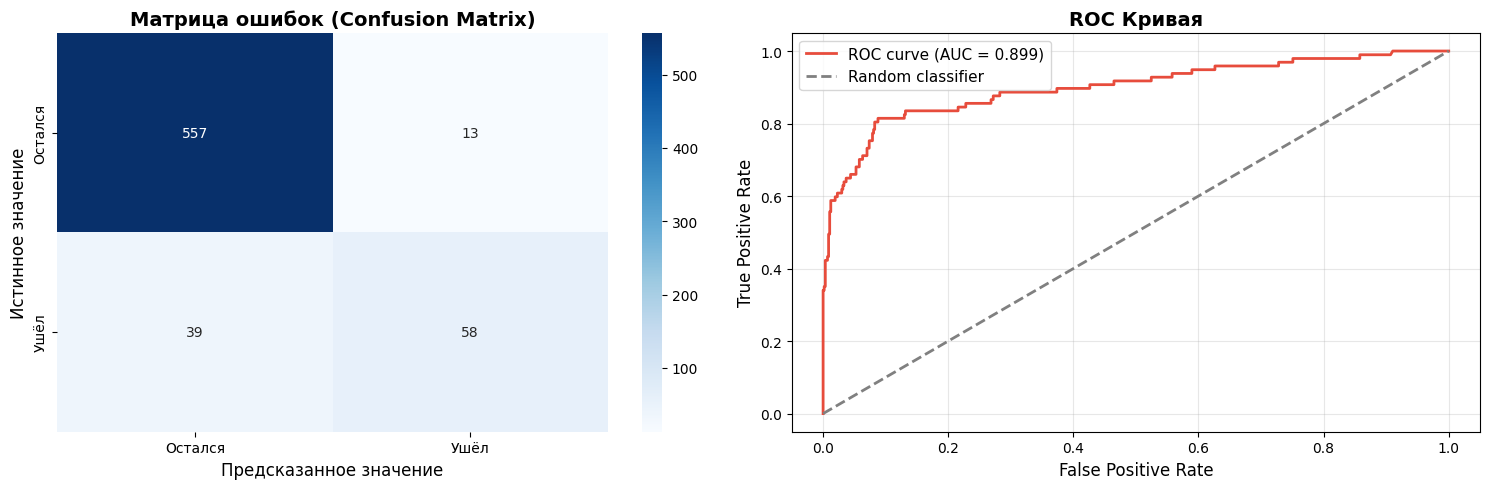


💡 Объяснение графиков для аудитории:
  - Confusion Matrix показывает, сколько предсказаний были правильными/неправильными
  - ROC-кривая показывает trade-off между True Positive Rate и False Positive Rate


In [67]:
# Визуализация результатов
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=True)
axes[0].set_title('Матрица ошибок (Confusion Matrix)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Предсказанное значение', fontsize=12)
axes[0].set_ylabel('Истинное значение', fontsize=12)
axes[0].set_xticklabels(['Остался', 'Ушёл'])
axes[0].set_yticklabels(['Остался', 'Ушёл'])

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
axes[1].plot(fpr, tpr, color='#e74c3c', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
axes[1].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random classifier')
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].set_title('ROC Кривая', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Объяснение графиков для аудитории:")
print("  - Confusion Matrix показывает, сколько предсказаний были правильными/неправильными")
print("  - ROC-кривая показывает trade-off между True Positive Rate и False Positive Rate")


In [68]:
# Feature Importance - какие признаки наиболее важны для модели?
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("Топ-10 самых важных признаков:")
print(feature_importance.head(10).to_string(index=False))

Топ-10 самых важных признаков:
             feature  importance
customerservicecalls   24.473937
     totaldayminutes   20.092644
   internationalplan   17.101895
      totaldaycharge   14.583365
      totalevecharge    7.165537
      totalintlcalls    5.122815
 numbervmailmessages    4.419811
     totalintlcharge    2.616862
    totalintlminutes    2.095693
     totaleveminutes    1.492930


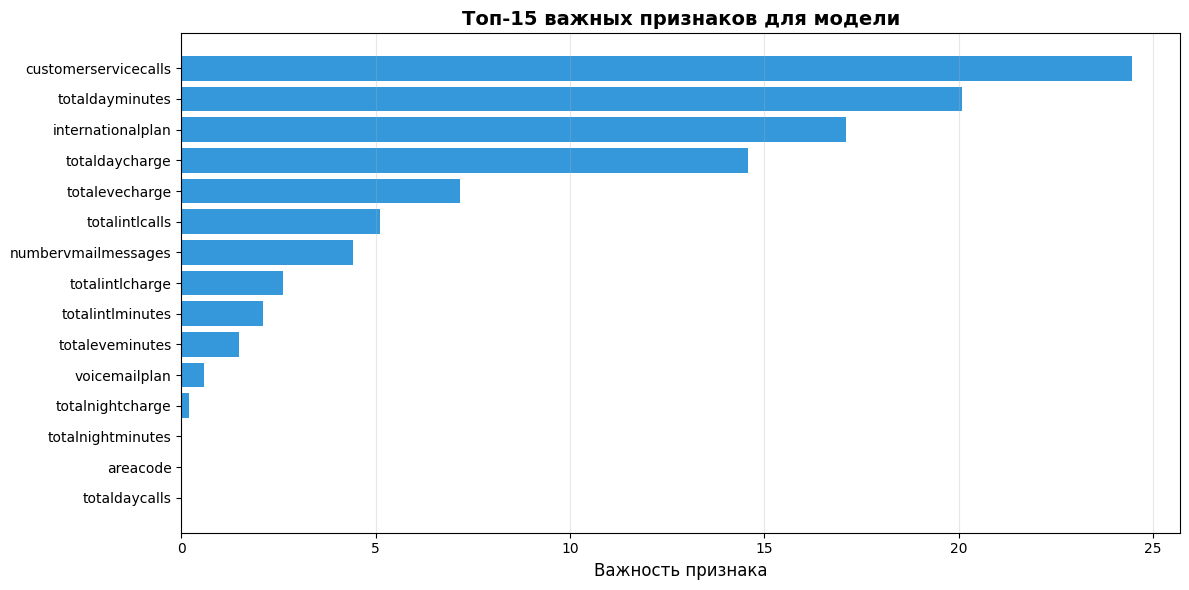

In [69]:
# Визуализация

plt.figure(figsize=(12, 6))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'], color='#3498db')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Важность признака', fontsize=12)
plt.title('Топ-15 важных признаков для модели', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


**💬 Обсуждение с аудиторией:**
- Какие признаки оказались самыми важными?
- Имеет ли это смысл с бизнес-точки зрения?
- Как можно использовать эту информацию?

## Шаг 1.4: Сохранение модели

<div style="padding: 12px 16px; margin: 16px 0; border-radius: 6px; border-left: 4px solid #3b82f6; background-color: #eff6ff; color: #1e40af;">
<strong>💡 Критически важно для production!</strong><br>В production мы НЕ будем переобучать модель при каждом запросе. Нужно сохранить модель и уметь восстановить её без повторного обучения.
</div>

### Что происходит при сохранении модели?

Мы делаем <strong>сериализацию</strong> — превращаем сложный Python‑объект (модель) в последовательность байтов, которую можно записать в файл и потом восстановить.


### Нативный метод CatBoost (`.cbm`)

```python
from catboost import CatBoostClassifier
import numpy as np

X_train = np.random.rand(100, 5)
y_train = np.random.randint(0, 2, 100)
model = CatBoostClassifier(iterations=200, depth=6, verbose=False)
model.fit(X_train, y_train)
model.save_model('catboost_model.cbm')

# 2. Загружаем и проверяем
loaded_model = CatBoostClassifier()
loaded_model.load_model('catboost_model.cbm')
preds = loaded_model.predict(X_train[:5])
print("Предсказания:", preds)
```

### Обзор альтернативных способов сериализации

После того как базовый `.cbm` проверен, можно посмотреть на универсальные форматы. Они пригодятся, если нужно сериализовать разные модели или пайплайны.

#### Joblib (`.joblib`)

```python
import joblib
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=100, depth=6, verbose=False)
model.fit(X_train, y_train)

joblib.dump(model, 'catboost_model.joblib')
loaded_joblib = joblib.load('catboost_model.joblib')
print(loaded_joblib.get_params())
```

**Когда использовать:** один и тот же подход для CatBoost, sklearn, XGBoost; поддерживает сжатие. Минус — файл обычно крупнее, загрузка медленнее.

#### Pickle (`.pkl`)

```python
import pickle
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=100, depth=6, verbose=False)
model.fit(X_train, y_train)

with open('catboost_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('catboost_model.pkl', 'rb') as f:
    loaded_pickle = pickle.load(f)
print('Модель загружена!')
```

**Когда использовать:** быстрые эксперименты и скрипты. Минус — вопросы безопасности (не загружать непроверенные `.pkl`) и самый большой размер файлов.

### Сравнение подходов

| Характеристика | CatBoost `.cbm` | Joblib `.joblib` | Pickle `.pkl` |
| --- | --- | --- | --- |
| Размер файла | 🏆 Самый маленький | Средний | Самый большой |
| Скорость загрузки | 🏆 Самая быстрая | Быстрая | Самая медленная |
| Совместимость | Только CatBoost | 🏆 Любые модели | 🏆 Любые модели |

**Мы используем формат `.cbm`** — он минимальный и быстро восстанавливается.

In [70]:
# Создаем директорию для моделей
import os

model_dir = 'models'
os.makedirs(model_dir, exist_ok=True) # -p

print(f"📁 Директория '{model_dir}' создана или уже существует")


📁 Директория 'models' создана или уже существует


In [71]:
# Сохранение модели нативным методом CatBoost

print("💾 Сохраняем модель...")
print("-" * 60)

# Сохранение модели в формате .cbm (CatBoost Model)
# Этот файл содержит всю необходимую информацию: модель, список признаков, метаданные
model_path = os.path.join(model_dir, 'churn_model.cbm')
model.save_model(model_path)

print(f"✅ Модель сохранена: {model_path}")
print(f"   Размер файла: {os.path.getsize(model_path) / 1024:.2f} KB")
print(f"   Количество признаков: {len(model.feature_names_)}")
print("-" * 60)
print("🎉 Модель успешно сохранена!")

💾 Сохраняем модель...
------------------------------------------------------------
✅ Модель сохранена: models/churn_model.cbm
   Размер файла: 24.30 KB
   Количество признаков: 19
------------------------------------------------------------
🎉 Модель успешно сохранена!


### Проверка: загружаем и тестируем модель

<div style="padding: 12px 16px; margin: 16px 0; border-radius: 6px; border-left: 4px solid #10b981; background-color: #f0fdf4; color: #047857;">
<strong>✅ Важно проверить!</strong><br>Убедитесь, что модель корректно загружается и работает перед деплоем.
</div>


In [72]:
# Проверка: загрузка и тестирование модели
print("🔍 Проверяем загрузку модели...\n")

# Загружаем модель нативным методом CatBoost
from catboost import CatBoostClassifier
loaded_model = CatBoostClassifier()
loaded_model.load_model(model_path)

# Получаем список признаков из модели (он сохраняется автоматически)
loaded_features = loaded_model.feature_names_

print("✅ Модель успешно загружена!")
print(f"\nТип модели: {type(loaded_model).__name__}")
print(f"Количество признаков: {len(loaded_features)}")
print(f"Список признаков: {loaded_features[:5]}... (показаны первые 5)")

🔍 Проверяем загрузку модели...

✅ Модель успешно загружена!

Тип модели: CatBoostClassifier
Количество признаков: 19
Список признаков: ['state', 'accountlength', 'areacode', 'internationalplan', 'voicemailplan']... (показаны первые 5)


In [73]:
# Тестируем на одном примере
test_sample = X_test.iloc[0:1]
prediction = loaded_model.predict(test_sample)
prediction_proba = loaded_model.predict_proba(test_sample)

print("\n" + "=" * 60)
print("ТЕСТ ПРЕДСКАЗАНИЯ")
print("=" * 60)

print(f"\nИстинное значение: {'Уйдёт' if y_test.iloc[0] == 1 else 'Останется'}")
print(f"Предсказание: {'Уйдёт' if prediction[0] == 1 else 'Останется'}")
print(f"Вероятность остаться: {prediction_proba[0][0]:.2%}")
print(f"Вероятность уйти: {prediction_proba[0][1]:.2%}")
print("\n✅ Модель успешно загружена и работает!")


ТЕСТ ПРЕДСКАЗАНИЯ

Истинное значение: Уйдёт
Предсказание: Уйдёт
Вероятность остаться: 47.00%
Вероятность уйти: 53.00%

✅ Модель успешно загружена и работает!


---

# 🎨 Часть 2: Знакомство со Streamlit

## Что такое Streamlit?

**Streamlit** — это Python библиотека для создания веб-приложений для Data Science и ML.

**Главное преимущество:** пишете на чистом Python, без HTML/CSS/JS!

## Установка

```bash
pip install streamlit
```

Проверка:
```bash
streamlit hello
```

## Первое приложение

Создайте файл `hello.py`:

```python
import streamlit as st

st.title("Моё первое приложение")
st.write("Привет, Streamlit!")
```

Запуск:
```bash
streamlit run hello.py
```

**Что происходит?** Streamlit автоматически открывает браузер с вашим приложением!


## Основные виджеты Streamlit

Давайте познакомимся с основными виджетами, которые мы будем использовать в нашем приложении:

### Текст и заголовки

```python
import streamlit as st

st.title("🤖 Заголовок приложения")
st.write("Обычный текст")
st.subheader("Подзаголовок")
```

### Загрузка файлов

```python
uploaded_file = st.file_uploader("Загрузите CSV", type=["csv"])
if uploaded_file:
    st.write("Файл загружен!")
```

### Ввод данных

```python
# Текстовое поле
name = st.text_input("Ваше имя")

# Числовое поле
age = st.number_input("Возраст", min_value=0, max_value=120)

# Выпадающий список
option = st.selectbox("Выберите опцию", ["Вариант 1", "Вариант 2"])

# Слайдер
value = st.slider("Выберите значение", 0, 100, 50)
```

### Отображение данных

```python
import pandas as pd

# Таблица
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
st.dataframe(df)

# Метрики
st.metric("Всего клиентов", 1000, delta=50)
```

### Кэширование

<div style="padding: 12px 16px; margin: 16px 0; border-radius: 6px; border-left: 4px solid #3b82f6; background-color: #eff6ff; color: #1e40af;">
<strong>ℹ️ Важно!</strong><br>Для загрузки данных и моделей используйте кэширование. Без кэширования данные/модель будут загружаться при каждом обновлении страницы!
</div>

```python
@st.cache_data  # Для данных
def load_data():
    return pd.read_csv("data.csv")

from catboost import CatBoostClassifier

@st.cache_resource  # Для моделей
def load_model():
    model = CatBoostClassifier()
    model.load_model("models/churn_model.cbm")
    return model
```

**Зачем?** Без кэширования данные/модель будут загружаться при каждом обновлении страницы!

## Что дальше?

Теперь, когда мы знаем основы Streamlit, давайте посмотрим, как создать ML-приложение для предсказания оттока клиентов!

**В следующей части** мы разберём готовое приложение `app.py` и увидим, как все эти виджеты работают вместе.


---

# 🚀 Часть 3: Разбор приложения app.py

Теперь давайте разберём готовое приложение для предсказания оттока клиентов. Мы посмотрим, как все изученные виджеты работают вместе в реальном проекте.

## Структура app.py

Приложение состоит из нескольких ключевых частей. Давайте разберём каждую:

### 1️⃣ Конфигурация страницы

```python
st.set_page_config(
    page_title="Churn Prediction",
    page_icon="🎯",
    layout="wide",
    initial_sidebar_state="expanded"
)
```

> 💡 Комментарий: задаём глобальные настройки страницы один раз; удобно описывать название, иконку и поведение боковой панели.

### 2️⃣ Кэширование модели

```python
from catboost import CatBoostClassifier

@st.cache_resource
def load_model():
    model = CatBoostClassifier()
    model.load_model('models/churn_model.cbm')
    feature_names = model.feature_names_
    return model, feature_names
```

> 💡 Комментарий: загружаем модель ровно один раз и сразу получаем список признаков из файла `.cbm`.

### 3️⃣ Функция предсказания

```python
def prepare_features(df, feature_names):
    # Автоматически определяем категориальные колонки по типу данных
    for col in feature_names:
        if col in df.columns and df[col].dtype in ('object', 'bool'):
            df[col] = df[col].astype(str)
    return df[feature_names]

def make_prediction(input_data):
    prepared_data = prepare_features(input_data, feature_names)
    prediction = model.predict(prepared_data)[0]
    probability = model.predict_proba(prepared_data)[0][1]
    return prediction, probability
```

> 💡 Комментарий: сначала приводим признаки к тому же виду, что и при обучении, потом делаем предсказание и вытаскиваем вероятность.

### 4️⃣ Загрузка данных и предсказания

```python
uploaded_file = st.sidebar.file_uploader("Загрузите CSV", type=["csv"])

if uploaded_file:
    df = load_data(uploaded_file)
    features = prepare_features(df, FEATURE_NAMES)
    probs = MODEL.predict_proба(features)[:, 1]
    preds = (probs >= 0.5).astype(int)
```

> 💡 Комментарий: считываем файл, прогоняем через те же преобразования и получаем вероятности/классы для всех строк.

### 5️⃣ Визуализации

```python
# Метрики
st.metric("Всего клиентов", len(df_result))
st.metric("Фактический отток", f"{churn_rate:.1f}%")

# Графики с Plotly
fig = px.pie(df_result, names='churn_label')
st.plotly_chart(fig, use_container_width=True)
```

> 💡 Комментарий: метрики показывают ключевые числа одной строкой, Plotly-графики дают наглядные доли/распределения.


---

# ☁️ Часть 4: Деплой на Streamlit Cloud

## Что нужно для деплоя?

Для деплоя на Streamlit Cloud нужно:

1. **GitHub репозиторий** с вашим кодом
2. **requirements.txt** со всеми зависимостями
3. **Папка models/** с сохранённой моделью CatBoost (`.cbm`)
4. **app.py** - ваше приложение

### Структура финального проекта:

```
churn-prediction-app/
│
├── app.py                     # Основное приложение
├── requirements.txt           # Зависимости Python
├── README.md                  # Описание проекта
├── .gitignore                 # Игнорируемые файлы
│
├── models/                    # Сохранённые модели
│   └── churn_model.cbm        # CatBoost модель в нативном формате
│
└── notebooks/                 # Ноутбуки (опционально)
    └── streamlit_webinar.ipynb
```


## Как задеплоить?

### Шаг 1: Создайте GitHub репозиторий

<div style="padding: 12px 16px; margin: 16px 0; border-radius: 6px; border-left: 4px solid #f59e0b; background-color: #fffbf0; color: #92400e;">
<strong>⚠️ Важно:</strong><br>Репозиторий должен быть <strong>Public</strong> для бесплатного деплоя на Streamlit Cloud!
</div>

1. Создайте новый репозиторий на GitHub (Public)
2. Загрузите туда ваш код:
   - `app.py`
   - `requirements.txt`
   - Папка `models/` с моделью

### Шаг 2: Деплой на Streamlit Cloud

1. Перейдите на [streamlit.io/cloud](https://streamlit.io/cloud)
2. Войдите через GitHub
3. Нажмите "New app"
4. Выберите ваш репозиторий
5. Укажите путь к `app.py`
6. Нажмите "Deploy"

<div style="padding: 12px 16px; margin: 16px 0; border-radius: 6px; border-left: 4px solid #10b981; background-color: #f0fdf4; color: #047857;">
<strong>✅ Готово!</strong><br>Ваше приложение будет доступно по ссылке вида: <code>https://YOUR_APP_NAME.streamlit.app</code>
</div>
# Перейдите в папку с проектом
cd "Modern_AI_Course_11_10 (AI)/Streamlit_Deploy_16_11"

**Инициализируйте git**
```bash
git init
```

**Добавьте все файлы**
```bash
git add .
```

((Создайте первый коммит))
```bash
git commit -m "Initial commit: Churn prediction app"
```

**Подключите удалённый репозиторий**
```bash
git branch -M main
git remote add origin https://github.com/YOUR_USERNAME/churn-prediction-app.git
```
**Отправьте код на GitHub**
```bash
git push -u origin main
```

**💡 Совет:** Замените `YOUR_USERNAME` на ваш GitHub username!

#### 1.3 Проверьте, что все файлы загружены
- Зайдите на GitHub и убедитесь, что файлы на месте
- Особенно проверьте папку `models/` с моделями!


### **Шаг 2: Регистрация на Streamlit Cloud**

#### **2.1 Создайте аккаунт**
1. Перейдите на [share.streamlit.io](https://share.streamlit.io/)
2. Нажмите **"Sign up"**
3. Выберите **"Continue with GitHub"**
4. Авторизуйтесь через GitHub

#### **2.2 Разрешите доступ к репозиториям**
1. Streamlit попросит доступ к вашим репозиториям
2. Нажмите **"Authorize streamlit"**
3. Выберите, какие репозитории разрешить (можно все или конкретные)

### **Шаг 3: Создание нового приложения**

#### **3.1 Запуск деплоя**
1. На главной странице Streamlit Cloud нажмите **"New app"**
2. Заполните форму:
   - **Repository:** выберите `YOUR_USERNAME/churn-prediction-app`
   - **Branch:** `main`
   - **Main file path:** `app.py`
   - **App URL** (необязательно): придумайте короткий URL, например `churn-predictor`

#### **3.2 Дополнительные настройки (опционально)**
- **Advanced settings:**
  - Python version: можно оставить по умолчанию
  - Secrets: если нужны API ключи (не нужно для нашего проекта)

#### **3.3 Нажмите `"Deploy!"`**

### **Шаг 4: Ожидание деплоя**

#### **Что происходит?**
1. ✅ Streamlit клонирует ваш репозиторий
2. ✅ Устанавливает зависимости из `requirements.txt`
3. ✅ Загружает модели
4. ✅ Запускает приложение

**Время ожидания:** 2-5 минут

#### **Что вы увидите?**
- Логи установки пакетов
- Прогресс-бар
- Если всё успешно - ваше приложение!


#### **Ваше приложение доступно по ссылке:**
```
https://YOUR_APP_NAME.streamlit.app
```

**Поделитесь ссылкой!** 🎉
- Отправьте коллегам
- Добавьте в резюме
- Опубликуйте в соцсетях
- Добавьте в портфолио

### **Шаг 5: Обновление приложения**

#### **Как обновить приложение после изменений?**

```bash
# Внесите изменения в код
# Например, добавьте новую функцию в app.py

# Сделайте коммит
git add .
git commit -m "Добавлена новая функция"

# Отправьте на GitHub
git push

# Streamlit автоматически переразвернёт приложение!
# Подождите 1-2 минуты
```

**Никаких дополнительных действий не нужно!** 🚀

#### **Просмотр логов**
- В Streamlit Cloud можно посмотреть логи приложения
- Нажмите на приложение → "Manage app" → "Logs"
- Полезно для отладки


## **Типичные проблемы при деплое и их решения**

### **❌ Проблема 1: ModuleNotFoundError**

**Ошибка:**
```
ModuleNotFoundError: No module named 'plotly'
```

**Причина:** Библиотека не указана в `requirements.txt`

**Решение:**
1. Добавьте библиотеку в `requirements.txt`
2. Сделайте commit и push
3. Streamlit автоматически переустановит зависимости

### **❌ Проблема 2: FileNotFoundError (модель не найдена)**

**Ошибка:**
```
FileNotFoundError: [Errno 2] No such file or directory: 'models/churn_model.cbm'
```

**Причины:**
- Папка `models/` не добавлена в git
- Неправильный путь к файлу

**Решение:**
```bash
# Проверьте, что папка models/ в git
git add models/
git commit -m "Add models directory"
git push

# Или используйте абсолютный путь в коде
import os
model_dir = os.path.join(os.path.dirname(__file__), 'models')
model_path = os.path.join(model_dir, 'churn_model.cbm')
```

### **❌ Проблема 3: Приложение долго загружается**

**Причины:**
- Большая модель
- Нет кэширования

**Решение:**
```python
# Используйте @st.cache_resource для кэширования
from catboost import CatBoostClassifier

@st.cache_resource
def load_model():
    model = CatBoostClassifier()
    model.load_model('models/churn_model.cbm')
    return model
```

### **❌ Проблема 4: Ошибки с версиями библиотек**

**Ошибка:**
```
ERROR: Could not find a version that satisfies the requirement scikit-learn==1.3.0
```

**Решение:**
- Используйте совместимые версии
- Можно указать `>=` вместо `==`:
```txt
scikit-learn>=1.3.0
streamlit>=1.28.0
```

### **❌ Проблема 5: Приложение падает при взаимодействии**

**Причина:** Ошибка в коде обработки данных

**Решение:**
1. Проверьте логи в Streamlit Cloud
2. Добавьте try-except блоки:
```python
try:
    prediction = model.predict(data)
except Exception as e:
    st.error(f"Ошибка предсказания: {e}")
```

### Чек-лист для успешного деплоя:

- [ ] Всё работает локально
- [ ] `requirements.txt` содержит все библиотеки
- [ ] Версии библиотек совместимы
- [ ] Модели добавлены в git
- [ ] Пути к файлам относительные (не абсолютные)
- [ ] Используется кэширование (`@st.cache_resource`)
- [ ] Есть обработка ошибок
- [ ] README.md написан
- [ ] Репозиторий Public (для бесплатного деплоя)


---

# 📚 Полезные ресурсы

## Официальная документация

### Streamlit
- 📖 [Streamlit Documentation](https://docs.streamlit.io/) - полная документация
- 🎨 [Streamlit Gallery](https://streamlit.io/gallery) - примеры приложений
- 🎥 [Streamlit YouTube](https://www.youtube.com/@streamlitofficial) - официальный канал
- 📚 [30 Days of Streamlit](https://30days.streamlit.app/) - 30-дневный челлендж

### Machine Learning
- 📖 [Scikit-learn Documentation](https://scikit-learn.org/stable/)
- 📊 [Pandas Documentation](https://pandas.pydata.org/docs/)
- 📈 [Plotly Python](https://plotly.com/python/)

